In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Loading the data

In [3]:
df = pd.read_csv("../data/raw/train.csv", names=["polarity", "title", "text"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [5]:
df.head()

,polarity,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [6]:
df.describe()

,polarity
count,3600000.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.5
75%,2.0
max,2.0


In [7]:
df.isnull().sum()

polarity      0
title       207
text          0
dtype: int64

In [8]:
df['polarity'].value_counts(normalize=True)

polarity
2    0.5
1    0.5
Name: proportion, dtype: float64

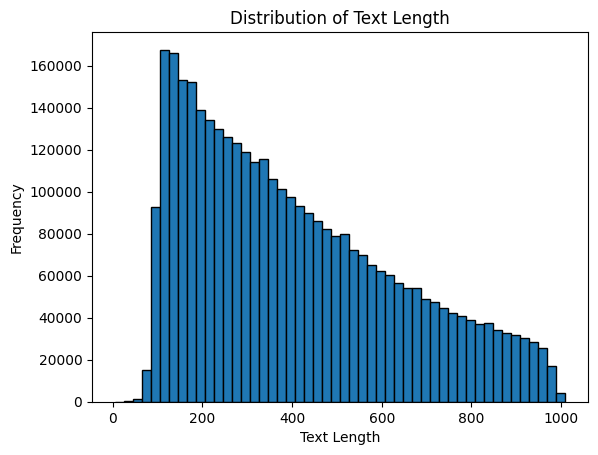

In [9]:
df["text_length"] = df["text"].apply(len)

plt.hist(df['text_length'], edgecolor='black', bins=50)

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')

plt.show()

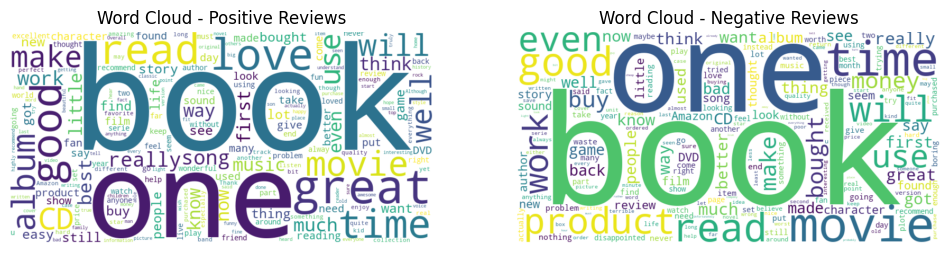

In [36]:
wordcloud_df_sample = df.sample(frac=0.01, random_state=42)

positive_text = ' '.join(wordcloud_df_sample[wordcloud_df_sample['polarity'] == 2]['text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

negative_text = ' '.join(wordcloud_df_sample[wordcloud_df_sample['polarity'] == 1]['text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')

plt.show()